In [1]:
# MUST be executed first, as sometimes causes the kernel to die and makes it inconvinient, since everything will need to be rerun
#to create sas_models simulation with GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import pyopencl as cl
import torch
cl.create_some_context()


<pyopencl.Context at 0x557cee783500 on <pyopencl.Device 'Quadro RTX 5000' on 'NVIDIA CUDA' at 0x557cee783140>>

In [2]:
import sys
sys.path.append('/home/slaskina/SAXS-simulations')


In [3]:
from SAXSsimulations import  Sphere, Cylinder, DensityData
from SAXSsimulations.plotting import *

In [34]:
def compare_spheres():
    sizes = [81, 125,243,343,441,625,729,875,945]
    plt.figure(figsize = (12,6))
    for alpha, s in enumerate(sizes):
        simulation = Sphere(size = 250, nPoints = s, volFrac = 0.01)
        simulation.place_shape(rMean = 5, nonoverlapping=False)
        simulation.calculate_custom_FTI(three_d = False)
        simulation.reBin(s//3, for_sas=True)
        simulation.drop_first_bin()
        if s ==441:
            simulation.init_sas_model()
            simulation.optimize_scaling()
            plt.plot(simulation.qx_sas, simulation.I_sas, '-', color = 'red', label = 'SasView')   
        plt.plot(simulation.binned_slice.Q, simulation.binned_slice.I, color = 'blue', alpha = alpha/9+0.1 if alpha<441 else alpha/9,  label = '{} points'.format(s))

    
    plt.xlabel(r"q $nm^{-1}$")
    plt.ylabel(r"I $(m sr)^{-1}$")
    plt.xscale('log') 
    plt.yscale('log') 
    plt.title(r'$Scattering curves for a sphere particle size of 5 nm in 250^3 nm simulated box$')
    order = [0,1,2,3,5,6,7,8,9,4]
    plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],title = 'Simulation' )
    plt.savefig('figures/spheres_5nm_comp.png', formmat = 'png')


spheres accepted:373 and declined: 0
spheres accepted:321 and declined: 0
spheres accepted:299 and declined: 0
spheres accepted:298 and declined: 0
spheres accepted:289 and declined: 0
spheres accepted:295 and declined: 0
spheres accepted:297 and declined: 0


KeyboardInterrupt: 

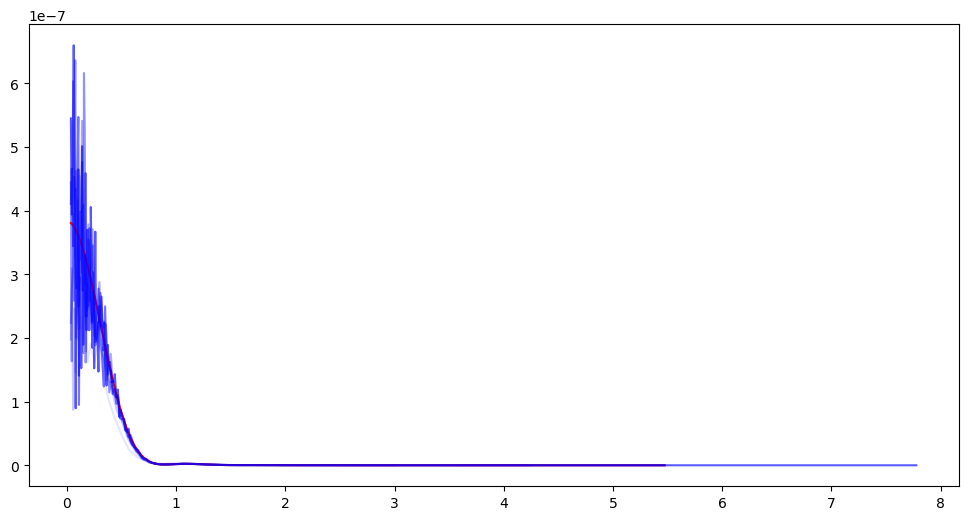

In [35]:
compare_spheres()


In [13]:
simulation = Sphere(size = 100, nPoints = 231, volFrac = 0.01)
simulation.place_shape(rMean = 2, nonoverlapping=False)

spheres accepted:304 and declined: 0


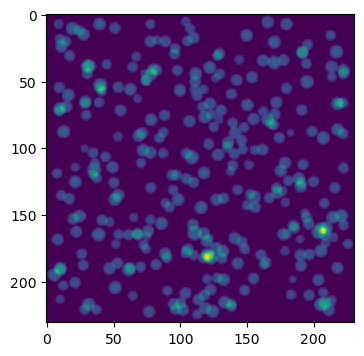

In [14]:
# the box summed on X-axis
plt.figure(figsize=(4,4))
plt.imshow(simulation.density.sum(axis=0));

In [5]:
simulation.calculate_custom_FTI(three_d = False)

/home/slaskina/SAXS-simulations/SAXSsimulations/create_form.py:162: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/aten/src/ATen/native/Copy.cpp:250.)
  if FT[:,i,j].any():


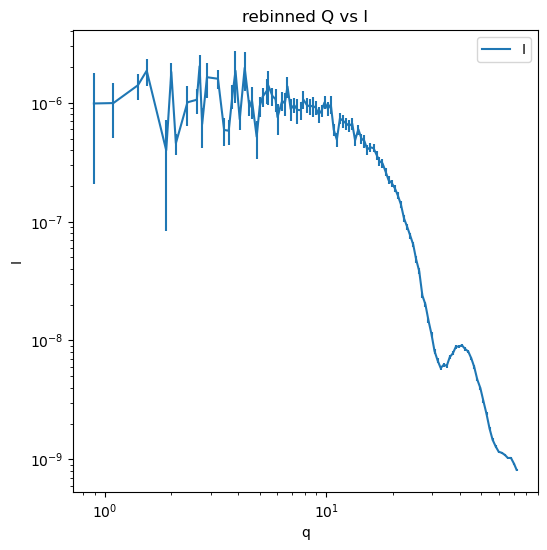

In [8]:

simulation.reBin(150, for_sas=True)
simulation.drop_first_bin()
plot_Q_vs_I(simulation.binned_slice)


In [10]:
simulation.binned_data

AttributeError: 'Sphere' object has no attribute 'binned_data'